# Your Uni : ya2516 (Also change Uni in the title of your notebook)
# Your Full name : Yuchen An
# Link to your Public Github repository with Final report  : https://github.com/Yuchen-A/ADV-Machine-Learning.git

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Get data in and set up X_train / X_test / y_train
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Get data in and set up X_train, X_test, y_train objects

**Instructions:**
Upload the world_happiness_competition_data.zip and newcountryvars.csv files on Colab by pressing the Folder icon on left tab (Shows "Files" on hovering), and then clicking the left-most file upload button (Shows "Upload to Session Storage" Alt text on hovering)

In [1]:
# Get training data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall()

In [22]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')## Load test features to predict on
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')## Load y train (true labels)
y_test = pd.read_csv('world_happiness_competition_data/y_test.csv')## Load y test (true labels)
y_train_labels = y_train.idxmax(axis=1) ## Examine what this does and write in next cell
y_test_labels = y_test.idxmax(axis=1)## Complete in a similar manner as above

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Latvia,1.187,1.465,0.812,0.264,0.075,0.064,Latvia,Europe,Northern Europe,125.611111
1,Burundi,0.046,0.447,0.380,0.220,0.176,0.180,Burundi,Africa,Sub-Saharan Africa,155.000000
2,Belarus,1.067,1.465,0.789,0.235,0.094,0.142,Belarus,Europe,Eastern Europe,4.000000
3,Liberia,0.073,0.922,0.443,0.370,0.233,0.033,Liberia,Africa,Sub-Saharan Africa,1419.095238
4,Ecuador,0.912,1.312,0.868,0.498,0.126,0.087,Ecuador,Americas,Latin America and the Caribbean,5.000000


In [23]:
display(y_train_labels)

0         High
1     Very Low
2      Average
3     Very Low
4         High
        ...   
64    Very Low
65         Low
66    Very Low
67        High
68    Very Low
Length: 69, dtype: object

Write in the next cell what the y_train_labels = y_train.idxmax(axis=1) line does. What is the difference between y_train_labels and y_train?

In [24]:
#Your answer: 

The line of code y_train_labels = y_train.idxmax(axis=1) returns the class label corresponding to the maximum value for each row in y_train. In this case, y_train contains all classes as binary values (0 and 1), indicating whether a sample belongs to a particular class (1) or not (0). The y_train_labels then identifies the specific class for each sample by finding the column with the value 1.

##  Add new data

In [25]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [26]:
# Merge in new data to X_train and X_test by taking "Country or region" from first table and "country_name" from 2nd table.

X_train = pd.merge(X_train, countrydata, left_on='Country or region', right_on='country_name', how='left')## Complete code
X_test = pd.merge(X_test, countrydata, left_on='Country or region', right_on='country_name', how='left')## Complete code


In [27]:
X_train.head(1)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Latvia,1.187,1.465,0.812,0.264,0.075,0.064,Latvia,Europe,Northern Europe,125.611111,Latvia,1949670.0,25.5,0.829862,74.342,15.97411,11.736418,22589.17355


# EDA

In [28]:
print(X_train.dtypes)

Country or region                 object
GDP per capita                   float64
Social support                   float64
Healthy life expectancy          float64
Freedom to make life choices     float64
Generosity                       float64
Perceptions of corruption        float64
name                              object
region                            object
sub-region                        object
Terrorist_attacks                float64
country_name                      object
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

In [29]:
## Your answer: 

I see the name of each column along with its corresponding data type in the X_train dataset. Columns like "Country or region" and "name" are object types, meaning they contain text data, while most other columns like "GDP per capita" and "population" are float64, representing numerical values. The dataset is a mix of categorical and numerical data from both the original and merged datasets, making it ready for further analysis.

Find out the number and percentage of missing values in the table per column

In [30]:
# Your code here:
num_missing_values = X_train.isnull().sum()
missing_percentage = (X_train.isnull().sum() / len(X_train)) * 100

missing_data = pd.DataFrame({
    'Missing Values': num_missing_values,
    'Percentage': missing_percentage
})

display(missing_data)

,Missing Values,Percentage
Country or region,0,0.000000
GDP per capita,0,0.000000
Social support,0,0.000000
Healthy life expectancy,0,0.000000
Freedom to make life choices,0,0.000000
Generosity,0,0.000000
Perceptions of corruption,0,0.000000
name,0,0.000000
region,0,0.000000
sub-region,0,0.000000


Plot the frequency distribution / histogram of some of the numerical features that you think are important

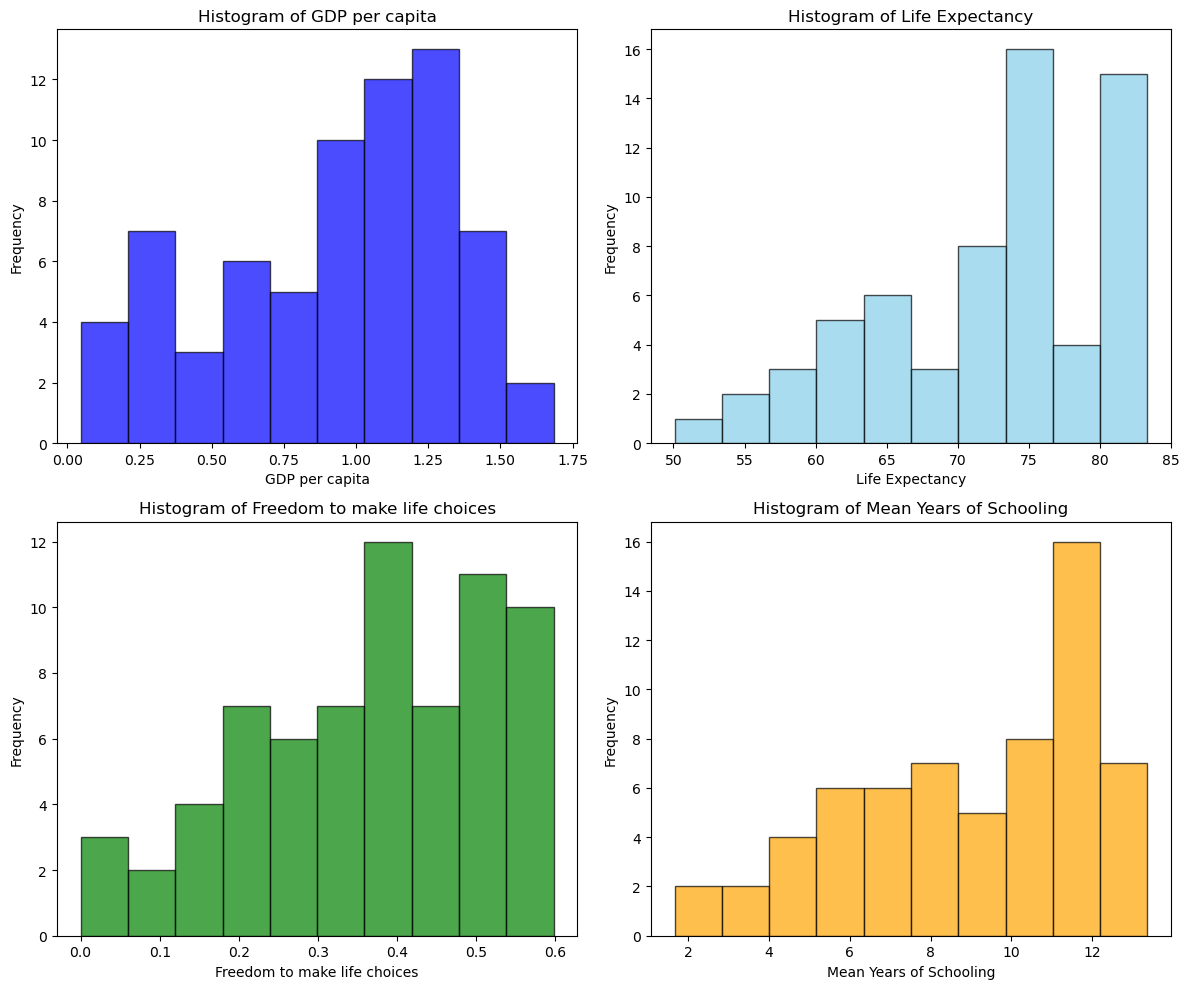

In [31]:
# Your plotting code here:

# I chose to plot the distribution of 'gdp per capita', distribution of 'life_expectancy', 
# distribution of 'Freedom to make life choices', and distribution of 'Mean Years of Schooling'. 

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Assuming X_train is your DataFrame and it is already defined.
plot_data_1 = X_train["GDP per capita"]
plot_data_2 = X_train["life_expectancy"]
plot_data_3 = X_train["Freedom to make life choices"]
plot_data_4 = X_train["mean_years_of_schooling"]

# Create a figure with 2x2 subplots
figure, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot histogram for GDP per capita
axs[0, 0].hist(plot_data_1, bins=10, color='blue', edgecolor='black', alpha=0.7)
axs[0, 0].set_title('Histogram of GDP per capita')
axs[0, 0].set_xlabel('GDP per capita')
axs[0, 0].set_ylabel('Frequency')

# Plot histogram for Life Expectancy
axs[0, 1].hist(plot_data_2, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
axs[0, 1].set_title('Histogram of Life Expectancy')
axs[0, 1].set_xlabel('Life Expectancy')
axs[0, 1].set_ylabel('Frequency')

# Plot histogram for Freedom to make life choices
axs[1, 0].hist(plot_data_3, bins=10, color='green', edgecolor='black', alpha=0.7)
axs[1, 0].set_title('Histogram of Freedom to make life choices')
axs[1, 0].set_xlabel('Freedom to make life choices')
axs[1, 0].set_ylabel('Frequency')

# Plot histogram for Mean Years of Schooling
axs[1, 1].hist(plot_data_4, bins=10, color='orange', edgecolor='black', alpha=0.7)
axs[1, 1].set_title('Histogram of Mean Years of Schooling')
axs[1, 1].set_xlabel('Mean Years of Schooling')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Plot the categorical variables and their distribution

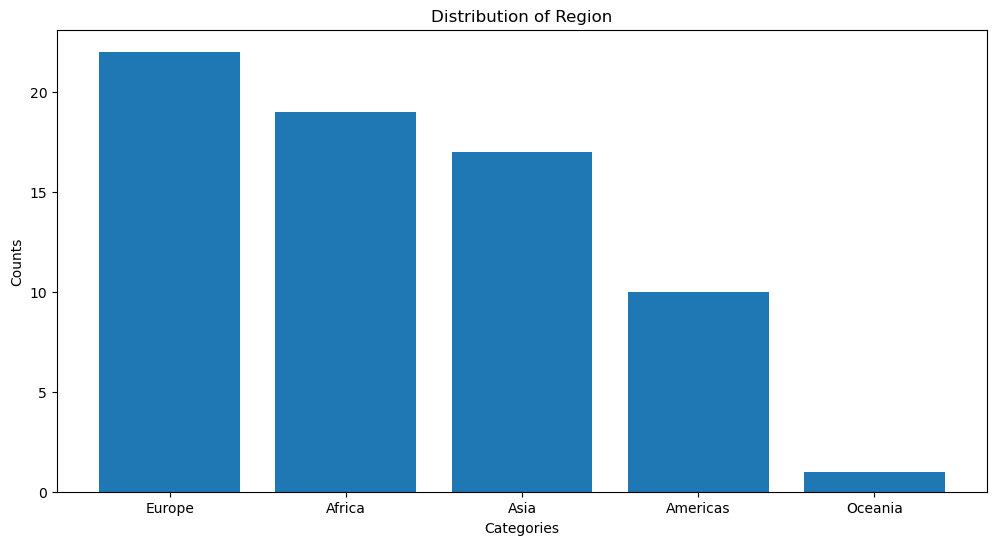

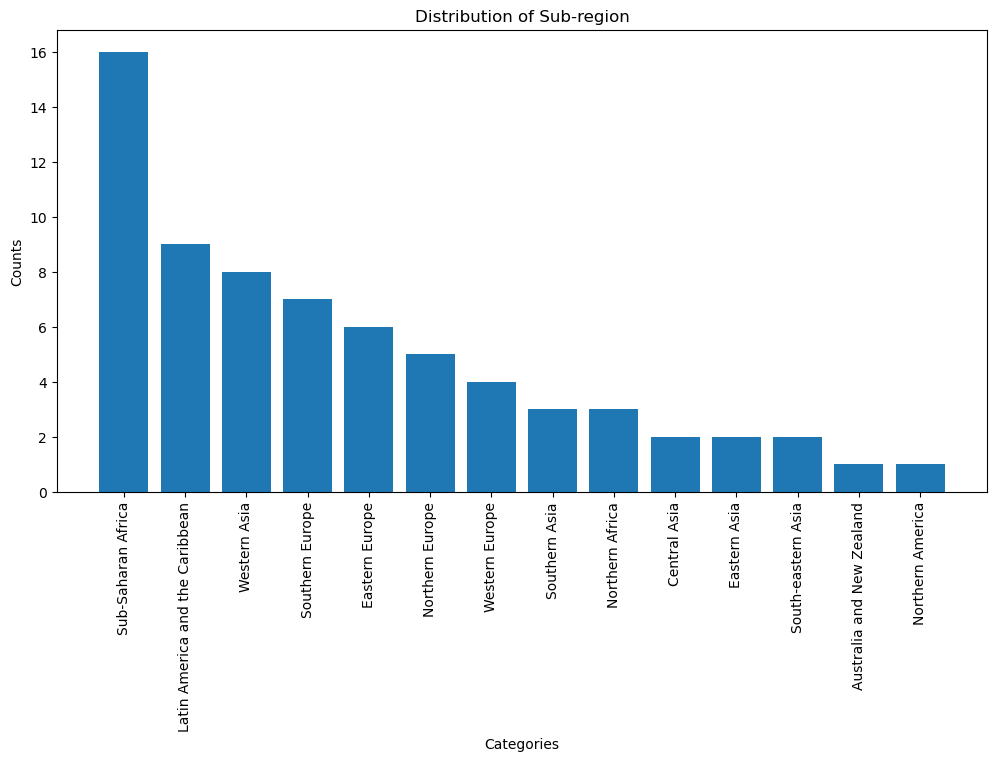

In [32]:
# Your plotting code here:

# I chose to plot the distribution of categorical variable "region" and 'sub_region'.

region_category_counts = X_train['region'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(region_category_counts.index, region_category_counts.values)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution of Region')
plt.show()

sub_region_category_counts = X_train['sub-region'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(sub_region_category_counts.index, sub_region_category_counts.values)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution of Sub-region')
plt.xticks(rotation=90)
plt.show()

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

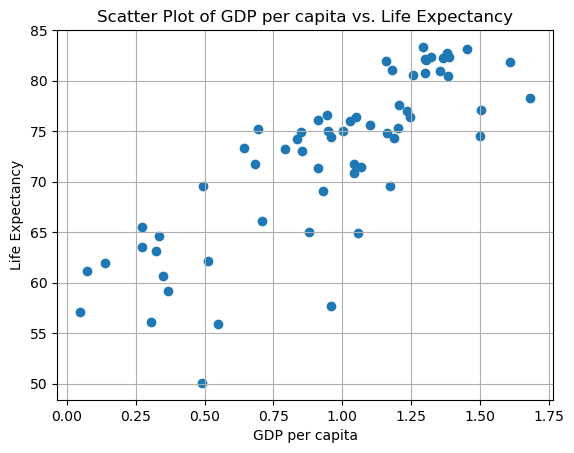

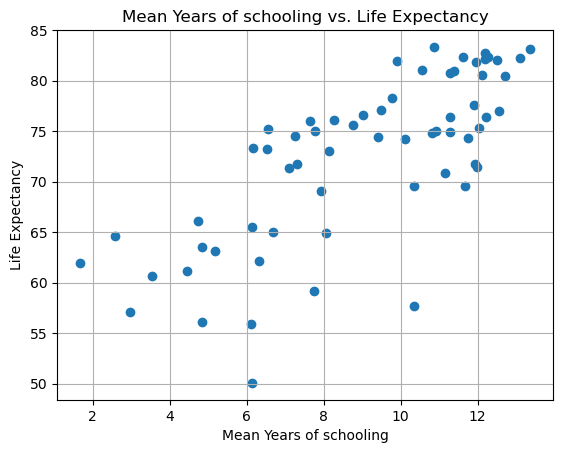

In [33]:
# Your plotting code(s) here:

# I chose to explore the relationship between 'gdp per capita' and 'life_expectancy', as well as the relationship 
# between 'mean_years_of_schooling' and 'life_expectancy'.

# From the scatter plots, we observe that both 'GDP per capita' and 'mean years of schooling' have a positive 
# relationship with 'life expectancy'.


plt.scatter(X_train['GDP per capita'], X_train['life_expectancy'])
plt.xlabel('GDP per capita')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of GDP per capita vs. Life Expectancy')
plt.grid()
plt.show()

plt.scatter(X_train['mean_years_of_schooling'], X_train['life_expectancy'])
plt.xlabel('Mean Years of schooling')
plt.ylabel('Life Expectancy')
plt.title('Mean Years of schooling vs. Life Expectancy')
plt.grid()
plt.show()

In [34]:
# Correlation table
# From the correlation table, almost all attributes show a positive correlation with 'life_expectancy','except for 
# 'Generosity,' 'Terrorist_attacks,' and 'population_below_poverty_line'.

correlation_matrix = X_train.corr()
display(correlation_matrix)

/var/folders/xl/1l26f1zs64vcyrn4b8yynjl00000gn/T/ipykernel_56629/1675485758.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X_train.corr()


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
GDP per capita,1.000000,0.776994,0.828855,0.497536,-0.087230,0.376035,-0.359662,0.010983,-0.783629,0.952534,0.819725,0.816278,0.806770,0.791134
Social support,0.776994,1.000000,0.732568,0.588616,-0.058026,0.290184,-0.445112,-0.078932,-0.671441,0.829772,0.713381,0.763511,0.794848,0.501397
Healthy life expectancy,0.828855,0.732568,1.000000,0.424599,-0.017666,0.379915,-0.402194,0.056740,-0.698012,0.919899,0.982990,0.837451,0.795686,0.570419
Freedom to make life choices,0.497536,0.588616,0.424599,1.000000,0.302245,0.493557,-0.381656,0.111773,-0.405978,0.428954,0.392675,0.356783,0.346807,0.457114
Generosity,-0.087230,-0.058026,-0.017666,0.302245,1.000000,0.274878,0.027501,-0.075887,0.069264,-0.123773,-0.017838,-0.141452,-0.147592,0.031449
Perceptions of corruption,0.376035,0.290184,0.379915,0.493557,0.274878,1.000000,-0.172918,-0.053192,-0.216316,0.367459,0.361583,0.319262,0.316947,0.463926
Terrorist_attacks,-0.359662,-0.445112,-0.402194,-0.381656,0.027501,-0.172918,1.000000,-0.033408,0.271698,-0.362150,-0.346591,-0.258710,-0.395745,-0.219806
population,0.010983,-0.078932,0.056740,0.111773,-0.075887,-0.053192,-0.033408,1.000000,-0.206060,-0.011924,0.034366,-0.015770,-0.094350,-0.072591
population_below_poverty_line,-0.783629,-0.671441,-0.698012,-0.405978,0.069264,-0.216316,0.271698,-0.206060,1.000000,-0.763920,-0.675131,-0.654276,-0.689748,-0.557626
hdi,0.952534,0.829772,0.919899,0.428954,-0.123773,0.367459,-0.362150,-0.011924,-0.763920,1.000000,0.904335,0.920350,0.907800,0.662804


Write what you observed and your General comments on what should be done:

In [35]:
# Your comments here

I observed that 'Generosity,' 'Terrorist_attacks,' and 'population_below_poverty_line' have negative relationship with 'life_expectancy'.This makes sense, as an increase in terrorist attacks and the proportion of poor people in a country is likely to result in a decrease in life expectancy in that country. To my surprise, 'Generosity' shows a negative correlation with 'life_expectancy'. Some countries may be overly generous in ways that lead to unsustainable economic practices, which negatively impact living conditions.

I observed that as GDP per capita increases, life expectancy also improves. Additionally, as the number of years 
of schooling increases, life expectancy tends to rise as well. These observations suggest that improving 
both economic conditions and educational access can enhance public health outcomes.

## 2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(include=['number'])## Drop all the non-numerical features from X_train
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), ## Is this good enough?
    ('imputer', SimpleImputer(strategy='median')), ## I change the fill_value from zero to median.
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer',  SimpleImputer(strategy='most_frequent' )),
    ('onehot', OneHotEncoder(handle_unknown= 'ignore'  ))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [37]:
## Your answer :

1. We filter out the numeric features from X_train and store the list of those numeric feature names.

2. We replace missing values in the numeric features with 0 to prevent errors during the model training process. We scale all numeric features so that they have a mean of 0 and a standard deviation of 1. The reason we standardize numeric features is to prevent features with larger ranges from disproportionately influencing the model.

3. We define the categorical features in the X_train. Then, we replace missing values in the categorical data with the most frequent value in each categorical feature. After that, we transform each category into a binary vector, which can be fed into machine learning models. We also instruct the model to ignore any categories in the test data  that weren't present in the training data.

4. We apply the numeric_transformer pipeline to the numeric_features and categrical_transformer to the categorical_features.Then, we fit the preprocessor using the training dataset X_train so that we can apply the same transformations to X_test, ensuring consistency between the two datasets. 

I changed the fill value for missing values from 0 to the median. From the previous EDA part, some features like 'population_below_poverty_line', 'life_expectancy', and 'mean_years_of_schooling'contain missing values. It is common sense that the population below the poverty line cannot be 0 in any country, just as life expectancy and mean years of schooling cannot be zero. Therefore, 0 is not a valid value within the context of the X_train data, which contains information related to countries.

In [38]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [39]:
## Your Answer :

The "preprocessor" object applies different transformations to different feature types.

The "preprocess" object contains the learned parameters from X_train, such as the means for imputation, scaling factors for standardization, and encoding rules for categorical features.

The 'preprocessor' function drops the columns 'Country or region' and 'name' from the input dataset and applies the preprocessor transformation to the remaining dataset.

The 'preprocessed_data' contains the fully transformed dataset where missing values have been replaced, 
numerical data has been scaled, and categorical data has been encoded."

In [40]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(69, 33)

## 3. Fit model on preprocessed data and save preprocessor function and model


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)## Define a Random Forest Model here, fit it, and score it

X_train_transformed = preprocessor(X_train)
X_test_transformed = preprocessor(X_test)

model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)

train_score = model.score(X_train_transformed, y_train)  
accuracy = accuracy_score(y_test, y_pred)

print(f'Training accuracy score: {train_score:.2f}')
print(f'Test accuracy score: {accuracy:.2f}')
# Your cell should have a score between 0-1 as output

Training accuracy score: 1.00
Test accuracy score: 0.32


## 4. Generate predictions from X_test data and compare it with true labels in Y_test.csv file


In [43]:
#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         4
           3       0.50      1.00      0.67         2
           4       0.60      0.75      0.67         4

   micro avg       0.50      0.32      0.39        19
   macro avg       0.32      0.39      0.32        19
weighted avg       0.31      0.32      0.29        19
 samples avg       0.32      0.32      0.32        19



/Users/anyuchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anyuchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5. Repeat submission process to improve place on leaderboard


In [44]:
# Train model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=5, random_state=42)

model_2.fit(preprocessor(X_train), y_train)
y_pred = model_2.predict(preprocessor(X_test))

train_score = model_2.score(preprocessor(X_train), y_train)
accuracy = accuracy_score(y_test, y_pred)

print(f'Training accuracy score: {train_score:.2f}')
print(f'Test accuracy score: {accuracy:.2f}')

Training accuracy score: 0.94
Test accuracy score: 0.32


 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [45]:
## Your answer :

I changed the parameters by increasing n_estimators, specifying max_depth, and increasing min_samples_split. A training accuracy of 1 can be a sign of overfitting. A model with a training accuracy of 0.94 might be better because it indicates that the model is not overfitting to the training data. 

The n_estimators represent the number of trees in the forest. Increasing the number of trees generally improves model performance and stability by averaging out predictions.

The max_depth represent the maximum depth of each tree. Typically, deeper trees can capture more intricate patterns of the dataset.

The min_samples_split represent the minimum number of samples required to split an internal node.Increasing min_samples_split encourages the model to create simpler trees that may not capture all the details of
the training data but are more likely to generalize well to unseen data.

In [46]:
#Evaluate Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels = model_2.predict(preprocessor(X_test))# Predict

## Write code to show model performance by comparing prediction_labels with true labels
print(classification_report(y_test, prediction_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      0.20      0.25         5
           2       0.00      0.00      0.00         4
           3       0.50      1.00      0.67         2
           4       0.60      0.75      0.67         4

   micro avg       0.50      0.32      0.39        19
   macro avg       0.29      0.39      0.32        19
weighted avg       0.27      0.32      0.28        19
 samples avg       0.32      0.32      0.32        19



/Users/anyuchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anyuchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [48]:
## Your answer:

It is worth making changes to the parameters. However, if we see that the model's performance only improves slightly or remains stable within a certain range, it may be unnecessary to continue trying new parameters. We do not need to keep trying random values because it is time-consuming and may carry a risk of overfitting. Alternatively, we can use grid search technique combined with cross-validation to find the optimal parameters.

In [45]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'n_estimators': np.arange(100, 600, 100),  
    'max_depth': [None] + list(np.arange(15, 31, 5)),  
    'min_samples_split': np.arange(2, 11, 1)}# Use np.arange to create a sequence of numbers for each parameter's space you think should be searched

gridmodel = RandomForestClassifier(random_state=42)# Read GridSearchCV docs and create an object with RandomForestClassifier as the model

#use model methods to fit score and predict model:
grid_search = GridSearchCV(estimator=gridmodel, param_grid=param_grid, 
                           cv=5, scoring='accuracy')
grid_search.fit(preprocessor(X_train), y_train)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(preprocessor(X_test))

accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy score: {accuracy:.2f}')

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid_search.best_score_))
print("best parameters: {}".format(grid_search.best_params_))


Test accuracy score: 0.32
best mean cross-validation score: 0.537
best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}


In [46]:
#Submit Model 3:

#-- Generate predicted values
prediction_labels = best_model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels
print(classification_report(y_test, prediction_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      0.20      0.25         5
           2       0.00      0.00      0.00         4
           3       0.50      1.00      0.67         2
           4       0.60      0.75      0.67         4

   micro avg       0.46      0.32      0.37        19
   macro avg       0.29      0.39      0.32        19
weighted avg       0.27      0.32      0.28        19
 samples avg       0.32      0.32      0.32        19



/Users/anyuchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anyuchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier



model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) ## Read documentations of imported models and fit them.

model.fit(preprocessor(X_train), y_train_labels)


#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels
print(classification_report(y_test_labels, prediction_labels))

              precision    recall  f1-score   support

     Average       0.33      0.25      0.29         4
        High       0.67      0.40      0.50         5
         Low       0.33      0.25      0.29         4
   Very High       0.50      1.00      0.67         2
    Very Low       0.50      0.75      0.60         4

    accuracy                           0.47        19
   macro avg       0.47      0.53      0.47        19
weighted avg       0.47      0.47      0.45        19



Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [47]:
## Your answer:

I define 'n_estimators' = 100, 'learning_rate' = 0.1, and 'max_depth' = 3. It works better than the Random Forest because Gradient Boosting builds trees sequentially, allowing each tree to correct the errors of the previous ones. With a learning rate of 0.1, each tree contributes minimally, improving generalization and reducing overfitting. The maximum depth of 3 keeps the trees simple, enabling the model to capture complex patterns in the data effectively.

# 6. Basic Deep Learning

In [90]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

feature_count= preprocessor(X_train).shape[1]#count features in input data

keras_model = Sequential() ## Define a Neural Network Model with 5 layers 128->64->64->32->(?)
keras_model.add(Dense(128, activation='relu', input_dim=feature_count))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
#Use Softmax activation in last layer. How many neurons should there be in the last layer?
#The y_train includes 5 columns, so 5 neurons should be in the output layer.
keras_model.add(Dense(5, activation='softmax'))
sgd = SGD(learning_rate=0.0001)

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
history = keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

2024-10-07 13:21:19.551696: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/anyuchen/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.1855 - loss: 1.6097 - val_accuracy: 0.2778 - val_loss: 1.5651
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2203 - loss: 1.5851 - val_accuracy: 0.3889 - val_loss: 1.5562
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2489 - loss: 1.5590 - val_accuracy: 0.3889 - val_loss: 1.5485
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2614 - loss: 1.5366 - val_accuracy: 0.3889 - val_loss: 1.5400
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2176 - loss: 1.5420 - val_accuracy: 0.3889 - val_loss: 1.5334
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2935 - loss: 1.5112 - val_accuracy: 0.4444 - val_loss: 1.5267
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2944 - loss: 1.5146 - val_accuracy: 0.4444 - val_loss: 1.5212
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3738 - loss: 1.4843 - val_accuracy: 0.4444 - val_loss:

Epoch 52/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6423 - loss: 1.0193 - val_accuracy: 0.5000 - val_loss: 1.2264
Epoch 53/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6967 - loss: 1.0318 - val_accuracy: 0.5000 - val_loss: 1.2242
Epoch 54/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6458 - loss: 1.0092 - val_accuracy: 0.5000 - val_loss: 1.2202
Epoch 55/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6333 - loss: 0.9837 - val_accuracy: 0.5000 - val_loss: 1.2128
Epoch 56/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6869 - loss: 0.9248 - val_accuracy: 0.5000 - val_loss: 1.2107
Epoch 57/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6958 - loss: 0.9371 - val_accuracy: 0.5000 - val_loss: 1.2045
Epoch 58/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6869 - loss: 0.9771 - val_accuracy: 0.5000 - val_loss: 1.1986
Epoch 59/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7815 - loss: 0.9430 - val_accuracy: 0.5000 - v

Epoch 103/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8689 - loss: 0.6349 - val_accuracy: 0.6111 - val_loss: 1.0554
Epoch 104/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8724 - loss: 0.6582 - val_accuracy: 0.6111 - val_loss: 1.0520
Epoch 105/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8403 - loss: 0.6552 - val_accuracy: 0.6111 - val_loss: 1.0556
Epoch 106/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8849 - loss: 0.6408 - val_accuracy: 0.6111 - val_loss: 1.0552
Epoch 107/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8537 - loss: 0.6540 - val_accuracy: 0.6111 - val_loss: 1.0539
Epoch 108/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8787 - loss: 0.6328 - val_accuracy: 0.6111 - val_loss: 1.0513
Epoch 109/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8474 - loss: 0.6846 - val_accuracy: 0.6111 - val_loss: 1.0479
Epoch 110/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8474 - loss: 0.6467 - val_accuracy: 0.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9358 - loss: 0.4095 - val_accuracy: 0.5556 - val_loss: 1.0429
Epoch 154/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9331 - loss: 0.4122 - val_accuracy: 0.5556 - val_loss: 1.0360
Epoch 155/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9483 - loss: 0.3935 - val_accuracy: 0.5556 - val_loss: 1.0408
Epoch 156/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9358 - loss: 0.3902 - val_accuracy: 0.5556 - val_loss: 1.0419
Epoch 157/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9268 - loss: 0.3948 - val_accuracy: 0.5556 - val_loss: 1.0467
Epoch 158/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9456 - loss: 0.3648 - val_accuracy: 0.5556 - val_loss: 1.0407
Epoch 159/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9143 - loss: 0.4105 - val_accuracy: 0.5556 - val_loss: 1.0382
Epoch 160/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9581 - loss: 0.3579 - val_accuracy: 0.5556 - val_los

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9902 - loss: 0.2320 - val_accuracy: 0.5556 - val_loss: 1.0581
Epoch 204/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9839 - loss: 0.2256 - val_accuracy: 0.5556 - val_loss: 1.0562
Epoch 205/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9839 - loss: 0.2504 - val_accuracy: 0.5556 - val_loss: 1.0638
Epoch 206/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9714 - loss: 0.2530 - val_accuracy: 0.5556 - val_loss: 1.0692
Epoch 207/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9902 - loss: 0.2092 - val_accuracy: 0.5556 - val_loss: 1.0686
Epoch 208/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9902 - loss: 0.2122 - val_accuracy: 0.5556 - val_loss: 1.0675
Epoch 209/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9839 - loss: 0.2171 - val_accuracy: 0.5556 - val_loss: 1.0653
Epoch 210/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9902 - loss: 0.1997 - val_accuracy: 0.5556 - val_los

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9714 - loss: 0.1618 - val_accuracy: 0.5556 - val_loss: 1.1416
Epoch 254/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9839 - loss: 0.1538 - val_accuracy: 0.5556 - val_loss: 1.1394
Epoch 255/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9839 - loss: 0.1372 - val_accuracy: 0.5556 - val_loss: 1.1477
Epoch 256/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9714 - loss: 0.1508 - val_accuracy: 0.5556 - val_loss: 1.1422
Epoch 257/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9714 - loss: 0.1598 - val_accuracy: 0.6111 - val_loss: 1.1372
Epoch 258/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9902 - loss: 0.1322 - val_accuracy: 0.5556 - val_loss: 1.1424
Epoch 259/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9714 - loss: 0.1543 - val_accuracy: 0.5556 - val_loss: 1.1498
Epoch 260/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9902 - loss: 0.1185 - val_accuracy: 0.6111 - val_los

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [91]:
## Your answer:

I used the ReLU activation function in the middle layers because it effectively introduces non-linearity and is computationally efficient.The reason for using softmax in the last layer is that it is specifically designed for multi-class classification problems. Since y_train contains multiple categories, softmax allows the model to assign probabilities to each class, enabling us to identify the most likely class.

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [ ]:
## Your answer:

Training for 300 epochs might be excessive and is not a good idea. An epoch refers to one complete pass through 
the entire training dataset. As I tracked the validation loss during training, I found that around the 190th epoch, the validation loss started to increase while the training loss continued to decrease. This is a sign of overfitting, which means that the model is learning the training data too well but is failing to generalize to unseen data. Therefore, training for more epochs is unnecessary.

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [92]:
## Your answer:

The loss function 'categorical_crossentropy' is commonly used in multi-class classification problems. We aim to minimize this loss during training, as it quantifies how well the predicted probabilities match the actual class labels.The optimizer 'sgd' updates the model's weights incrementally for for each training batch and helps the model converge towards the minimum loss based on the loss gradient.

I don't want to change them. The loss function 'categorical_crossentropy' typically paired with the 
softmax activation and effectively measures the model's performance in predicting class probabilities. The optimizer'sgd' helps the model learn efficiently by adjusting weights based on the loss gradient. Together, they work well for multi-class classification tasks.

Can you try getting the model's training history out and plotting the curves?

The training history shows a consistent downward trend in the training loss, indicating that the model is effectively learning from the training data. However, a contrasting pattern is observed in the validation loss, which begins to increase toward the end of the training process. This divergence suggests that the model may be overfitting the training data.

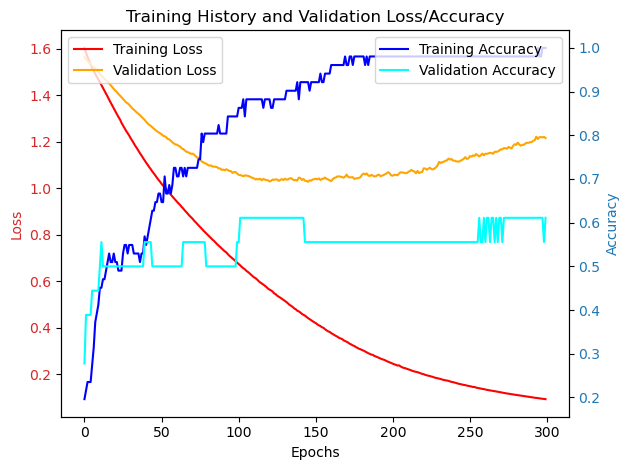

In [93]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)
# Create a new figure
fig, ax1 = plt.subplots()

# Plotting the loss values
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(loss, label='Training Loss', color='red')
ax1.plot(val_loss, label='Validation Loss', color='orange')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Creating a second y-axis for accuracy
ax2 = ax1.twinx()  
ax2.set_ylabel('Accuracy', color='tab:blue')  
ax2.plot(accuracy, label='Training Accuracy', color='blue')
ax2.plot(val_accuracy, label='Validation Accuracy', color='cyan')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Training History and Validation Loss/Accuracy')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [94]:
#-- Generate predicted y values

#Note: Keras predict returns the predicted column index location for classification models
predictions = keras_model.predict(preprocessor(X_test))
prediction_column_index = np.argmax(predictions, axis=1)# Predict

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

## Write code to show model performance by comparing prediction_labels with true labels
true_labels = y_test.values.argmax(axis=1)
print(classification_report(true_labels, prediction_column_index, target_names=y_train.columns))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00         4
        High       0.60      0.60      0.60         5
         Low       0.67      0.50      0.57         4
   Very High       0.67      1.00      0.80         2
    Very Low       0.60      0.75      0.67         4

    accuracy                           0.53        19
   macro avg       0.51      0.57      0.53        19
weighted avg       0.49      0.53      0.50        19



In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

In [54]:
# I would like to try the BaggingClassifier model, but it does not perform very well.

model = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100, random_state=42)
model.fit(preprocessor(X_train), y_train_labels)
prediction_labels = model.predict(preprocessor(X_test))

print(classification_report(y_test_labels, prediction_labels))

/Users/anyuchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

     Average       0.00      0.00      0.00         4
        High       0.50      0.40      0.44         5
         Low       0.00      0.00      0.00         4
   Very High       0.50      1.00      0.67         2
    Very Low       0.50      1.00      0.67         4

    accuracy                           0.42        19
   macro avg       0.30      0.48      0.36        19
weighted avg       0.29      0.42      0.33        19



Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

/Users/anyuchen/opt/anaconda3/lib/python3.9/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


(33,)


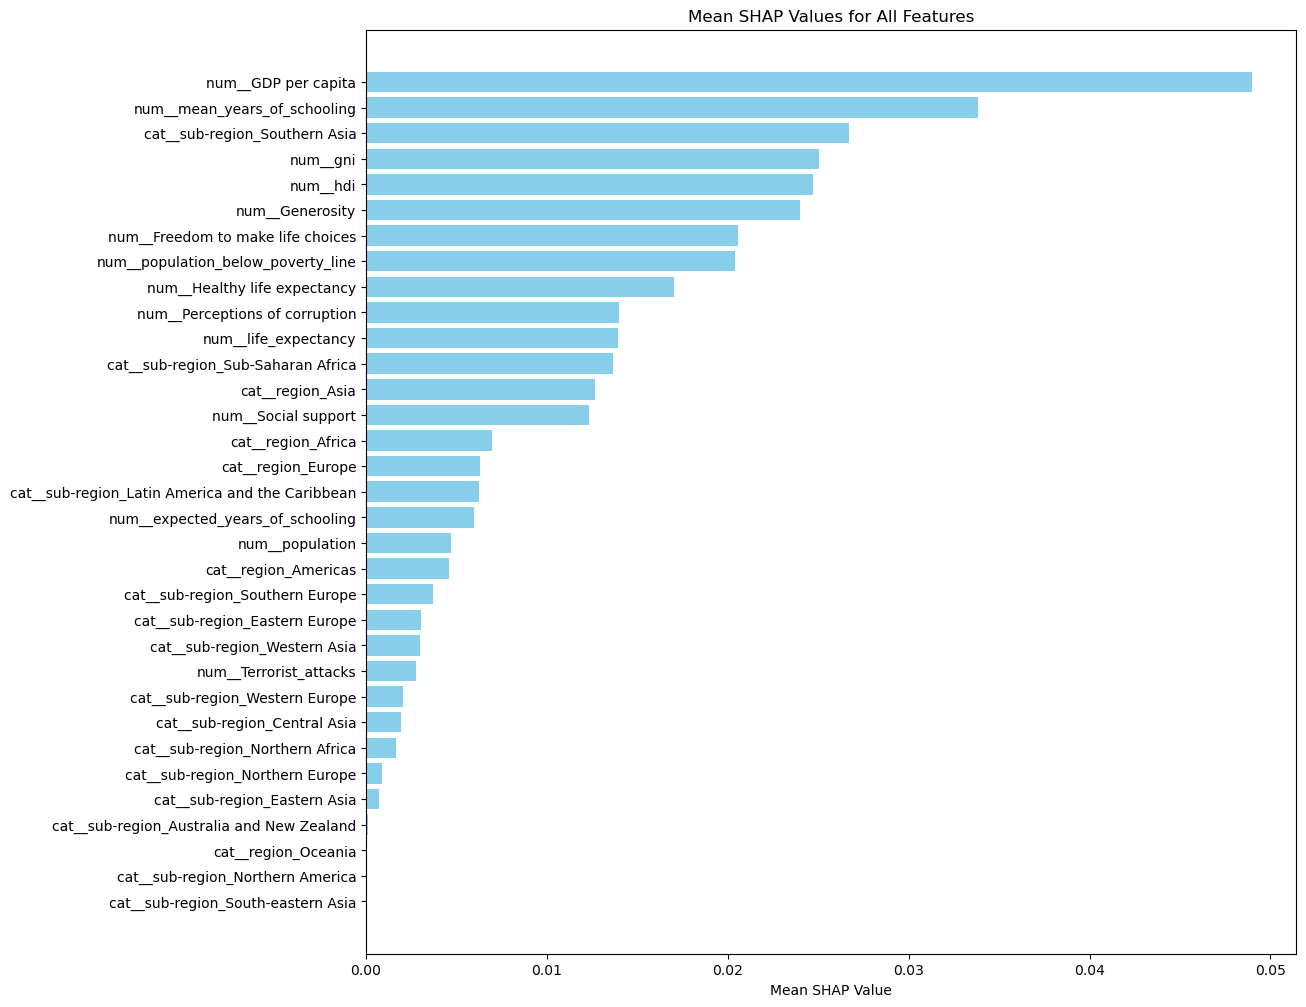

In [107]:
## Your Code and Answer:
import shap

explainer = shap.DeepExplainer(keras_model, preprocessor(X_train))
shap_values = explainer.shap_values(preprocessor(X_test))

# Average the absolute SHAP values across all instances for each feature
shap_values_combined = shap_values[0]  # Use the first output if you have multiple outputs
mean_shap_values = np.mean(np.abs(shap_values_combined), axis=1)  # Use absolute values for better interpretation

print(mean_shap_values.shape)

# Get feature names from the preprocessor
columns = preprocess.get_feature_names_out()  # Get the feature names after transformation

# Create a DataFrame for easier plotting
shap_df = pd.DataFrame({
    'Feature': columns,
    'Mean SHAP Value': mean_shap_values
})

# Sort the DataFrame by Mean SHAP Value
shap_df = shap_df.sort_values(by='Mean SHAP Value', ascending=True)

# Plot the final bar plot
plt.figure(figsize=(12, 12))
plt.barh(shap_df['Feature'], shap_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.title('Mean SHAP Values for All Features')
plt.show()

SHAP values effectively represent the contribution of each feature to a model's predictions. For example, a mean SHAP value of 0.05 indicates that an increase in GDP per capita is associated is associated with a significant increase in predicted happiness levels. A mean SHAP value of 0.035 suggests that an increase in expected years of schooling is linked to a significant increase in predicted happiness levels. Overall, these SHAP values provide clear and insightful explanations of how my model makes decisions. However, challenges such as model complexity, feature interactions, and data quality can complicate the justification process. Therefore, I think combining SHAP values with clear illustrations of the model and features could enhances overall interpretability.

# 7. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked